<a href="https://colab.research.google.com/github/sidrasultana41/corona_tweet_classification./blob/main/corona_tweet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Corona_NLP_train.csv", encoding = "Latin-1")
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.columns

In [ ]:
df = df.drop('Location',axis='columns')
df = df.drop('TweetAt',axis='columns')

In [ ]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


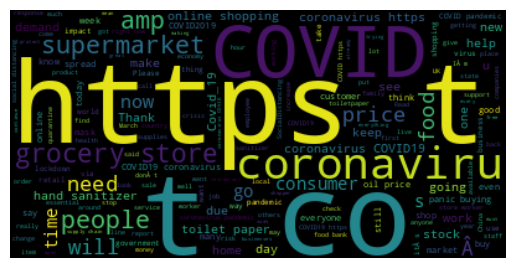

In [ ]:
# prompt: Using dataframe df: create a world cloud with column OriginalTweet

from wordcloud import WordCloud

text = ' '.join(df['OriginalTweet'])
wordcloud = WordCloud(max_words=200).generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

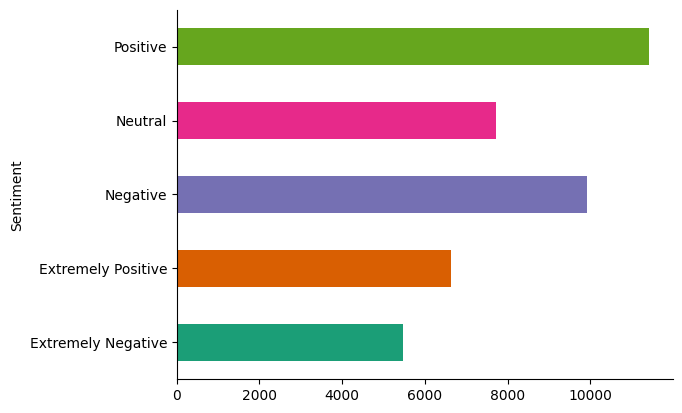

In [ ]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
for i in range(3):
  print(df['OriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P


In [ ]:
# prompt: use df and write code to eliminate all non alphanumeric data  + URL + punctuation from column name OrignalTweets

import re

df['CleanOriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]+', ' ', x))
df['CleanOriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(r'http\S+', ' ', x))


In [ ]:
df.head()

,OriginalTweet,Sentiment,CleanOriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv https t co iFz9F...
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...


In [ ]:
for i in range(3):
  print(df['OriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P


In [ ]:
for i in range(3):
  print(df['CleanOriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv   and   and  
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak  


In [ ]:
df.head()

,OriginalTweet,Sentiment,CleanOriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [ ]:
# prompt: Using dataframe df: we need to remove stops words

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['CleanOriginalTweet'] = df['CleanOriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,OriginalTweet,Sentiment,CleanOriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv
1,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths give elderly...
3,My food stock is not the only one which is emp...,Positive,"My food stock one empty... PLEASE, panic, THER..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready go supermarket #COVID19 outbreak. No..."


In [ ]:
# prompt: Using dataframe df: now do lammatization

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['CleanOriginalTweet'] = df['CleanOriginalTweet'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...


,OriginalTweet,Sentiment,CleanOriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv
1,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths give elderly...
3,My food stock is not the only one which is emp...,Positive,"My food stock one empty... PLEASE, panic, THER..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready go supermarket #COVID19 outbreak. No..."


In [ ]:
# prompt: Using dataframe df: now do stemming

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df['CleanOriginalTweet'] = df['CleanOriginalTweet'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df.head()


,OriginalTweet,Sentiment,CleanOriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@menyrbi @phil_gahan @chrisitv
1,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,Positive,"coronaviru australia: woolworth give elderly, ..."
3,My food stock is not the only one which is emp...,Positive,"my food stock one empty... please, panic, ther..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"me, readi go supermarket #covid19 outbreak. no..."


In [ ]:
# prompt: Using dataframe df: Do tokenization

from nltk.tokenize import word_tokenize

df['OriginalTweet_tokenized'] = df['CleanOriginalTweet'].apply(word_tokenize)
df.head()


,OriginalTweet,Sentiment,CleanOriginalTweet,OriginalTweet_tokenized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@menyrbi @phil_gahan @chrisitv,"[@, menyrbi, @, phil_gahan, @, chrisitv]"
1,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...,"[advic, talk, neighbour, famili, exchang, phon..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"coronaviru australia: woolworth give elderly, ...","[coronaviru, australia, :, woolworth, give, el..."
3,My food stock is not the only one which is emp...,Positive,"my food stock one empty... please, panic, ther...","[my, food, stock, one, empty, ..., please, ,, ..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"me, readi go supermarket #covid19 outbreak. no...","[me, ,, readi, go, supermarket, #, covid19, ou..."


In [ ]:
def update(cat):
    if cat == "Neutral":
        return 0
    elif cat == "Positive":
        return 1
    elif cat == "Extremely Positive":
        return 2
    elif cat == "Extremely Negative":
        return -2
    elif cat == "Negative":
        return -1
    return cat


df["Sentiment"] = df["Sentiment"].apply(update)
df.head()

,OriginalTweet,Sentiment,CleanOriginalTweet,OriginalTweet_tokenized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,@menyrbi @phil_gahan @chrisitv,"[@, menyrbi, @, phil_gahan, @, chrisitv]"
1,advice Talk to your neighbours family to excha...,1,advic talk neighbour famili exchang phone numb...,"[advic, talk, neighbour, famili, exchang, phon..."
2,Coronavirus Australia: Woolworths to give elde...,1,"coronaviru australia: woolworth give elderly, ...","[coronaviru, australia, :, woolworth, give, el..."
3,My food stock is not the only one which is emp...,1,"my food stock one empty... please, panic, ther...","[my, food, stock, one, empty, ..., please, ,, ..."
4,"Me, ready to go at supermarket during the #COV...",-2,"me, readi go supermarket #covid19 outbreak. no...","[me, ,, readi, go, supermarket, #, covid19, ou..."


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.pipeline import Pipeline
# for evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix

X = df["CleanOriginalTweet"]
y = df["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

tfidf = TfidfVectorizer()

logistic_regression = LogisticRegression()
naive_bayes = MultinomialNB()

lr = Pipeline([("tfidf", tfidf), ("logistic_regression", logistic_regression)])
nb = Pipeline([("tfidf", tfidf), ("naive_bayes", naive_bayes)])

lr.fit(X_train, y_train)
nb.fit(X_train, y_train)

y_pred1 = lr.predict(X_test)
y_pred2 = nb.predict(X_test)

accuracylr = accuracy_score(y_test, y_pred1)
accuracynb = accuracy_score(y_test, y_pred2)

print("Logistic Regression Accuracy:", accuracylr)
print("Naive Bayes Accuracy:", accuracynb)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5743440233236151
Naive Bayes Accuracy: 0.3746355685131195


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
for i in range(3):
  print(df['OriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P


In [ ]:
for i in range(3):
  print(df['CleanOriginalTweet'][i])

@menyrbi @phil_gahan @chrisitv
advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account po adequ suppli regular med order
coronaviru australia: woolworth give elderly, disabl dedic shop hour amid covid-19 outbreak
